<div class="alert alert-warning">
<b><font color = black
         
Problem 2:

A company performed a survey to understand the income of households in various neighbourhoods of a country. The data dictionary is also present. You can access the data dictionary from the following file Income_Data Dictionary. Please refer to the following data set to solve the problem Income.csv. ['FamilyIncome' is the target variable]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

# EDA

<div class="alert alert-warning">
<b><font color = black

2.1) Perform exploratory data analysis on the dataset. Showcase some charts, graphs.

#### Defining dataframe Income 

In [2]:
inc= pd.read_csv('Income.csv')
inc

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,40,13,0.0000,0.00,3020,43,16,9.2715,10,10,9.5,5,28200
749,0,31,12,0.0000,0.00,2056,33,12,4.8638,12,12,7.5,14,10000
750,0,43,12,0.0000,0.00,2383,43,12,1.0898,10,3,7.5,4,9952
751,0,60,12,0.0000,0.00,1705,55,8,12.4400,12,12,14.0,15,24984


In [3]:
# Taking the First five Values using head()
inc.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


In [4]:
# calculating the shape of the dataframe
inc.shape

(753, 14)

In [5]:
#Getting The Information about the datatypes in the Income dataframe.
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WorkingHoursWife     753 non-null    int64  
 1   WifeAge              753 non-null    int64  
 2   EducationWife        753 non-null    int64  
 3   WifeHourEarnings     753 non-null    float64
 4   WifeWage             753 non-null    float64
 5   WorkingHoursHusband  753 non-null    int64  
 6   HusbandAge           753 non-null    int64  
 7   EducationHusband     753 non-null    int64  
 8   HusbandWage          753 non-null    float64
 9   EducationWifeMother  753 non-null    int64  
 10  EducationWifeFather  753 non-null    int64  
 11  UnemploymentRate     753 non-null    float64
 12  WifeExperience       753 non-null    int64  
 13  FamilyIncome         753 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 82.5 KB


In [6]:
#Getting The summary of the dataset
inc.describe().T

,count,mean,std,min,25%,50%,75%,max
WorkingHoursWife,753.0,740.576361,871.314216,0.0000,0.0000,288.0000,1516.0000,4950.000
WifeAge,753.0,42.537849,8.072574,30.0000,36.0000,43.0000,49.0000,60.000
EducationWife,753.0,12.286853,2.280246,5.0000,12.0000,12.0000,13.0000,17.000
WifeHourEarnings,753.0,2.374565,3.241829,0.0000,0.0000,1.6250,3.7879,25.000
WifeWage,753.0,1.849734,2.419887,0.0000,0.0000,0.0000,3.5800,9.980
WorkingHoursHusband,753.0,2267.270916,595.566649,175.0000,1928.0000,2164.0000,2553.0000,5010.000
HusbandAge,753.0,45.120850,8.058793,30.0000,38.0000,46.0000,52.0000,60.000
EducationHusband,753.0,12.491368,3.020804,3.0000,11.0000,12.0000,15.0000,17.000
HusbandWage,753.0,7.482179,4.230559,0.4121,4.7883,6.9758,9.1667,40.509
EducationWifeMother,753.0,9.250996,3.367468,0.0000,7.0000,10.0000,12.0000,17.000


In [7]:
edu=inc[['EducationWife']]
edu

,EducationWife
0,12
1,12
2,12
3,12
4,14
...,...
748,13
749,12
750,12
751,12


In [8]:


print("Count of wives with 12 years education \n") 
print(edu[edu.EducationWife == 12].count())

print(" Count of wives with 13 years education \n")
print(edu[edu.EducationWife == 13].count())

print(" Count of wives with 14 years education \n" )
print(edu[edu.EducationWife == 14].count())

print(" Count of wives with 15 years education \n") 
print(edu[edu.EducationWife == 15].count())

print(" Count of wives with 16 years education \n")
print(edu[edu.EducationWife == 16].count())

print(" Count of wives with 17 years education ")
print(edu[edu.EducationWife == 17].count())

Count of wives with 12 years education 

EducationWife    381
dtype: int64
 Count of wives with 13 years education 

EducationWife    44
dtype: int64
 Count of wives with 14 years education 

EducationWife    51
dtype: int64
 Count of wives with 15 years education 

EducationWife    14
dtype: int64
 Count of wives with 16 years education 

EducationWife    57
dtype: int64
 Count of wives with 17 years education 
EducationWife    46
dtype: int64


In [9]:
eduhus=inc[['EducationHusband']]
eduhus


print(" Count of Husband with 15 years education \n")
print(eduhus[eduhus.EducationHusband == 15].count())

print(" Count of Husband with 16 years education \n")
print(eduhus[eduhus.EducationHusband == 16].count())

print(" Count of Husband with 17 years education ")
print(eduhus[eduhus.EducationHusband == 17].count())

 Count of Husband with 15 years education 

EducationHusband    18
dtype: int64
 Count of Husband with 16 years education 

EducationHusband    93
dtype: int64
 Count of Husband with 17 years education 
EducationHusband    93
dtype: int64


In [10]:
# creating another dataframe "Df" for boxplots
df=inc 


# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]


Number of duplicate rows = 0


,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome


In [11]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### BoxPlots of each variable corresponding to family income

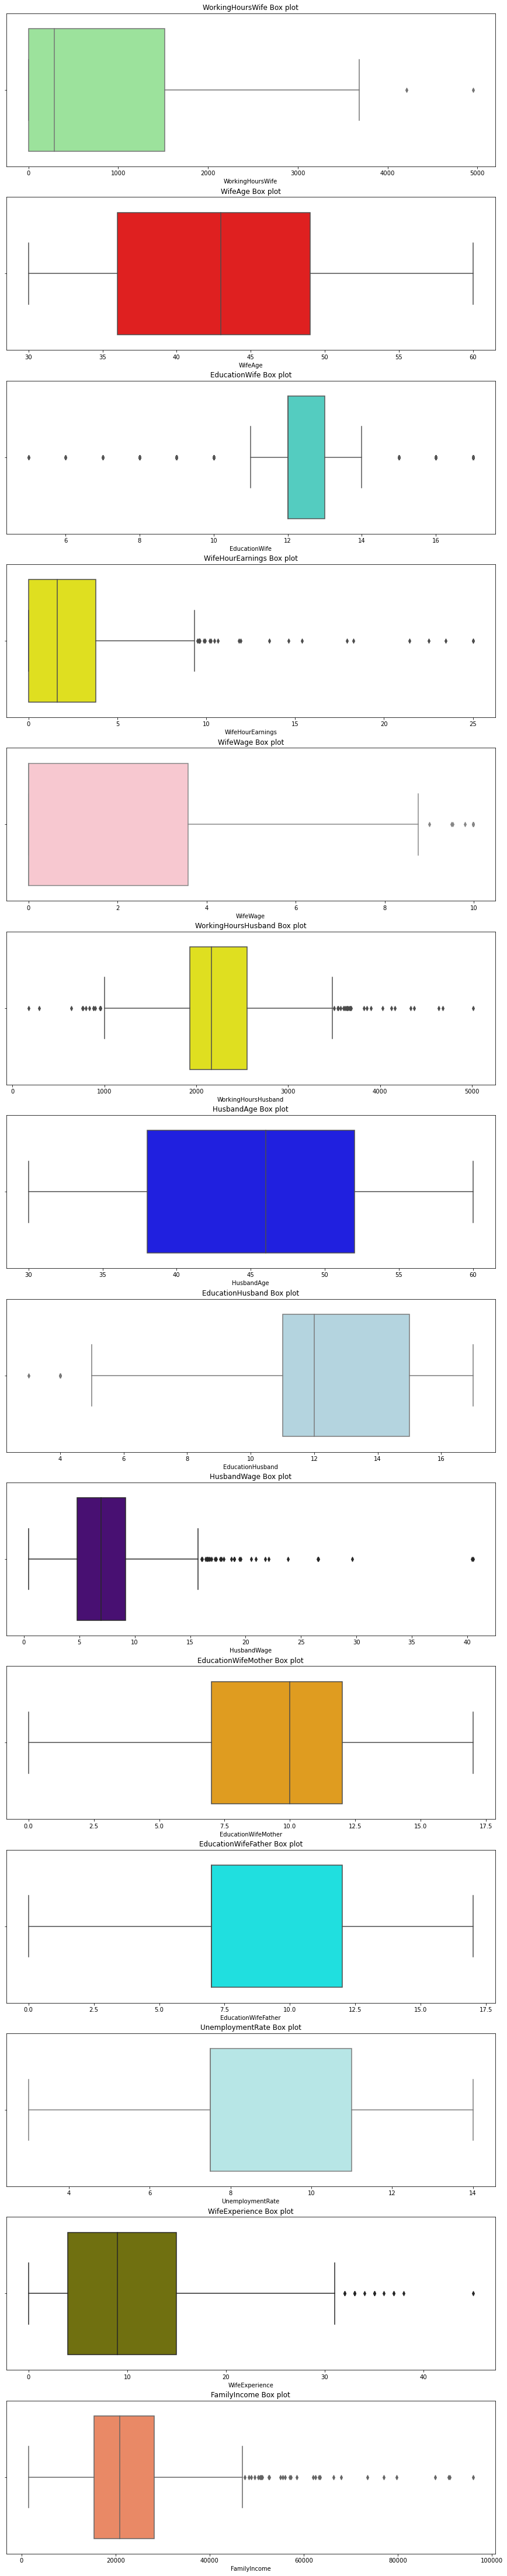

In [12]:
plt.figure(figsize= (15,80))
plt.subplot(14,1,1)
sns.boxplot(x= df["WorkingHoursWife"], color='lightgreen')
plt.title('WorkingHoursWife Box plot')

plt.subplot(14,1,2)
sns.boxplot(x= df["WifeAge"], color='red')
plt.title('WifeAge Box plot')

plt.subplot(14,1,3)
sns.boxplot(x= df["EducationWife"], color='turquoise')
plt.title('EducationWife Box plot')

plt.subplot(14,1,4)
sns.boxplot(x= df["WifeHourEarnings"], color='yellow')
plt.title('WifeHourEarnings Box plot')

plt.subplot(14,1,5)
sns.boxplot(x= df["WifeWage"], color='pink')
plt.title('WifeWage Box plot')

plt.subplot(14,1,6)
sns.boxplot(x= df["WorkingHoursHusband"], color='yellow')
plt.title('WorkingHoursHusband Box plot')

plt.subplot(14,1,7)
sns.boxplot(x= df["HusbandAge"], color='blue')
plt.title('HusbandAge Box plot')

plt.subplot(14,1,8)
sns.boxplot(x= df["EducationHusband"], color='lightblue')
plt.title('EducationHusband Box plot')

plt.subplot(14,1,9)
sns.boxplot(x= df["HusbandWage"], color='indigo')
plt.title('HusbandWage Box plot')

plt.subplot(14,1,10)
sns.boxplot(x= df["EducationWifeMother"], color='orange')
plt.title('EducationWifeMother Box plot')

plt.subplot(14,1,11)
sns.boxplot(x= df["EducationWifeFather"], color='cyan')
plt.title('EducationWifeFather Box plot')

plt.subplot(14,1,12)
sns.boxplot(x= df["UnemploymentRate"], color='paleturquoise')
plt.title('UnemploymentRate Box plot')

plt.subplot(14,1,13)
sns.boxplot(x= df["WifeExperience"], color='olive')
plt.title('WifeExperience Box plot')

plt.subplot(14,1,14)
sns.boxplot(x= df["FamilyIncome"], color='coral')
plt.title('FamilyIncome Box plot')

plt.show()


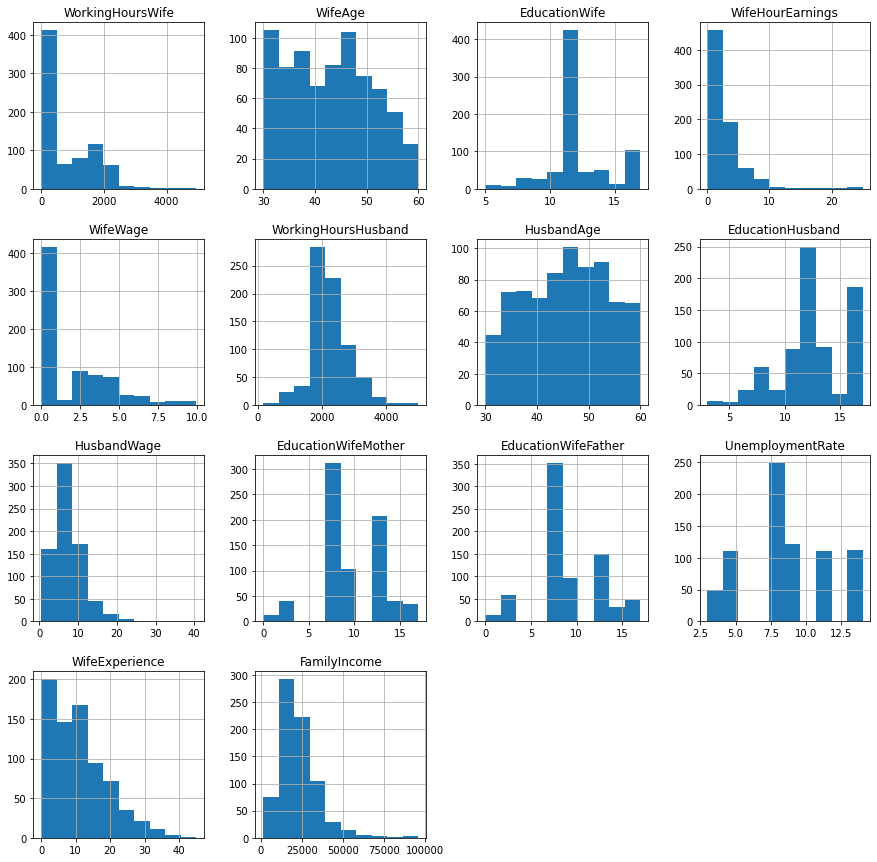

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

df.hist();

#### Wife'age is multimodal.
#### wifeExperience , Wife hour Earnings, Husband wage family's income is right skewed .
#### husbandage, workingHoursHusband is normally distributed.

## Pairplot for correlation

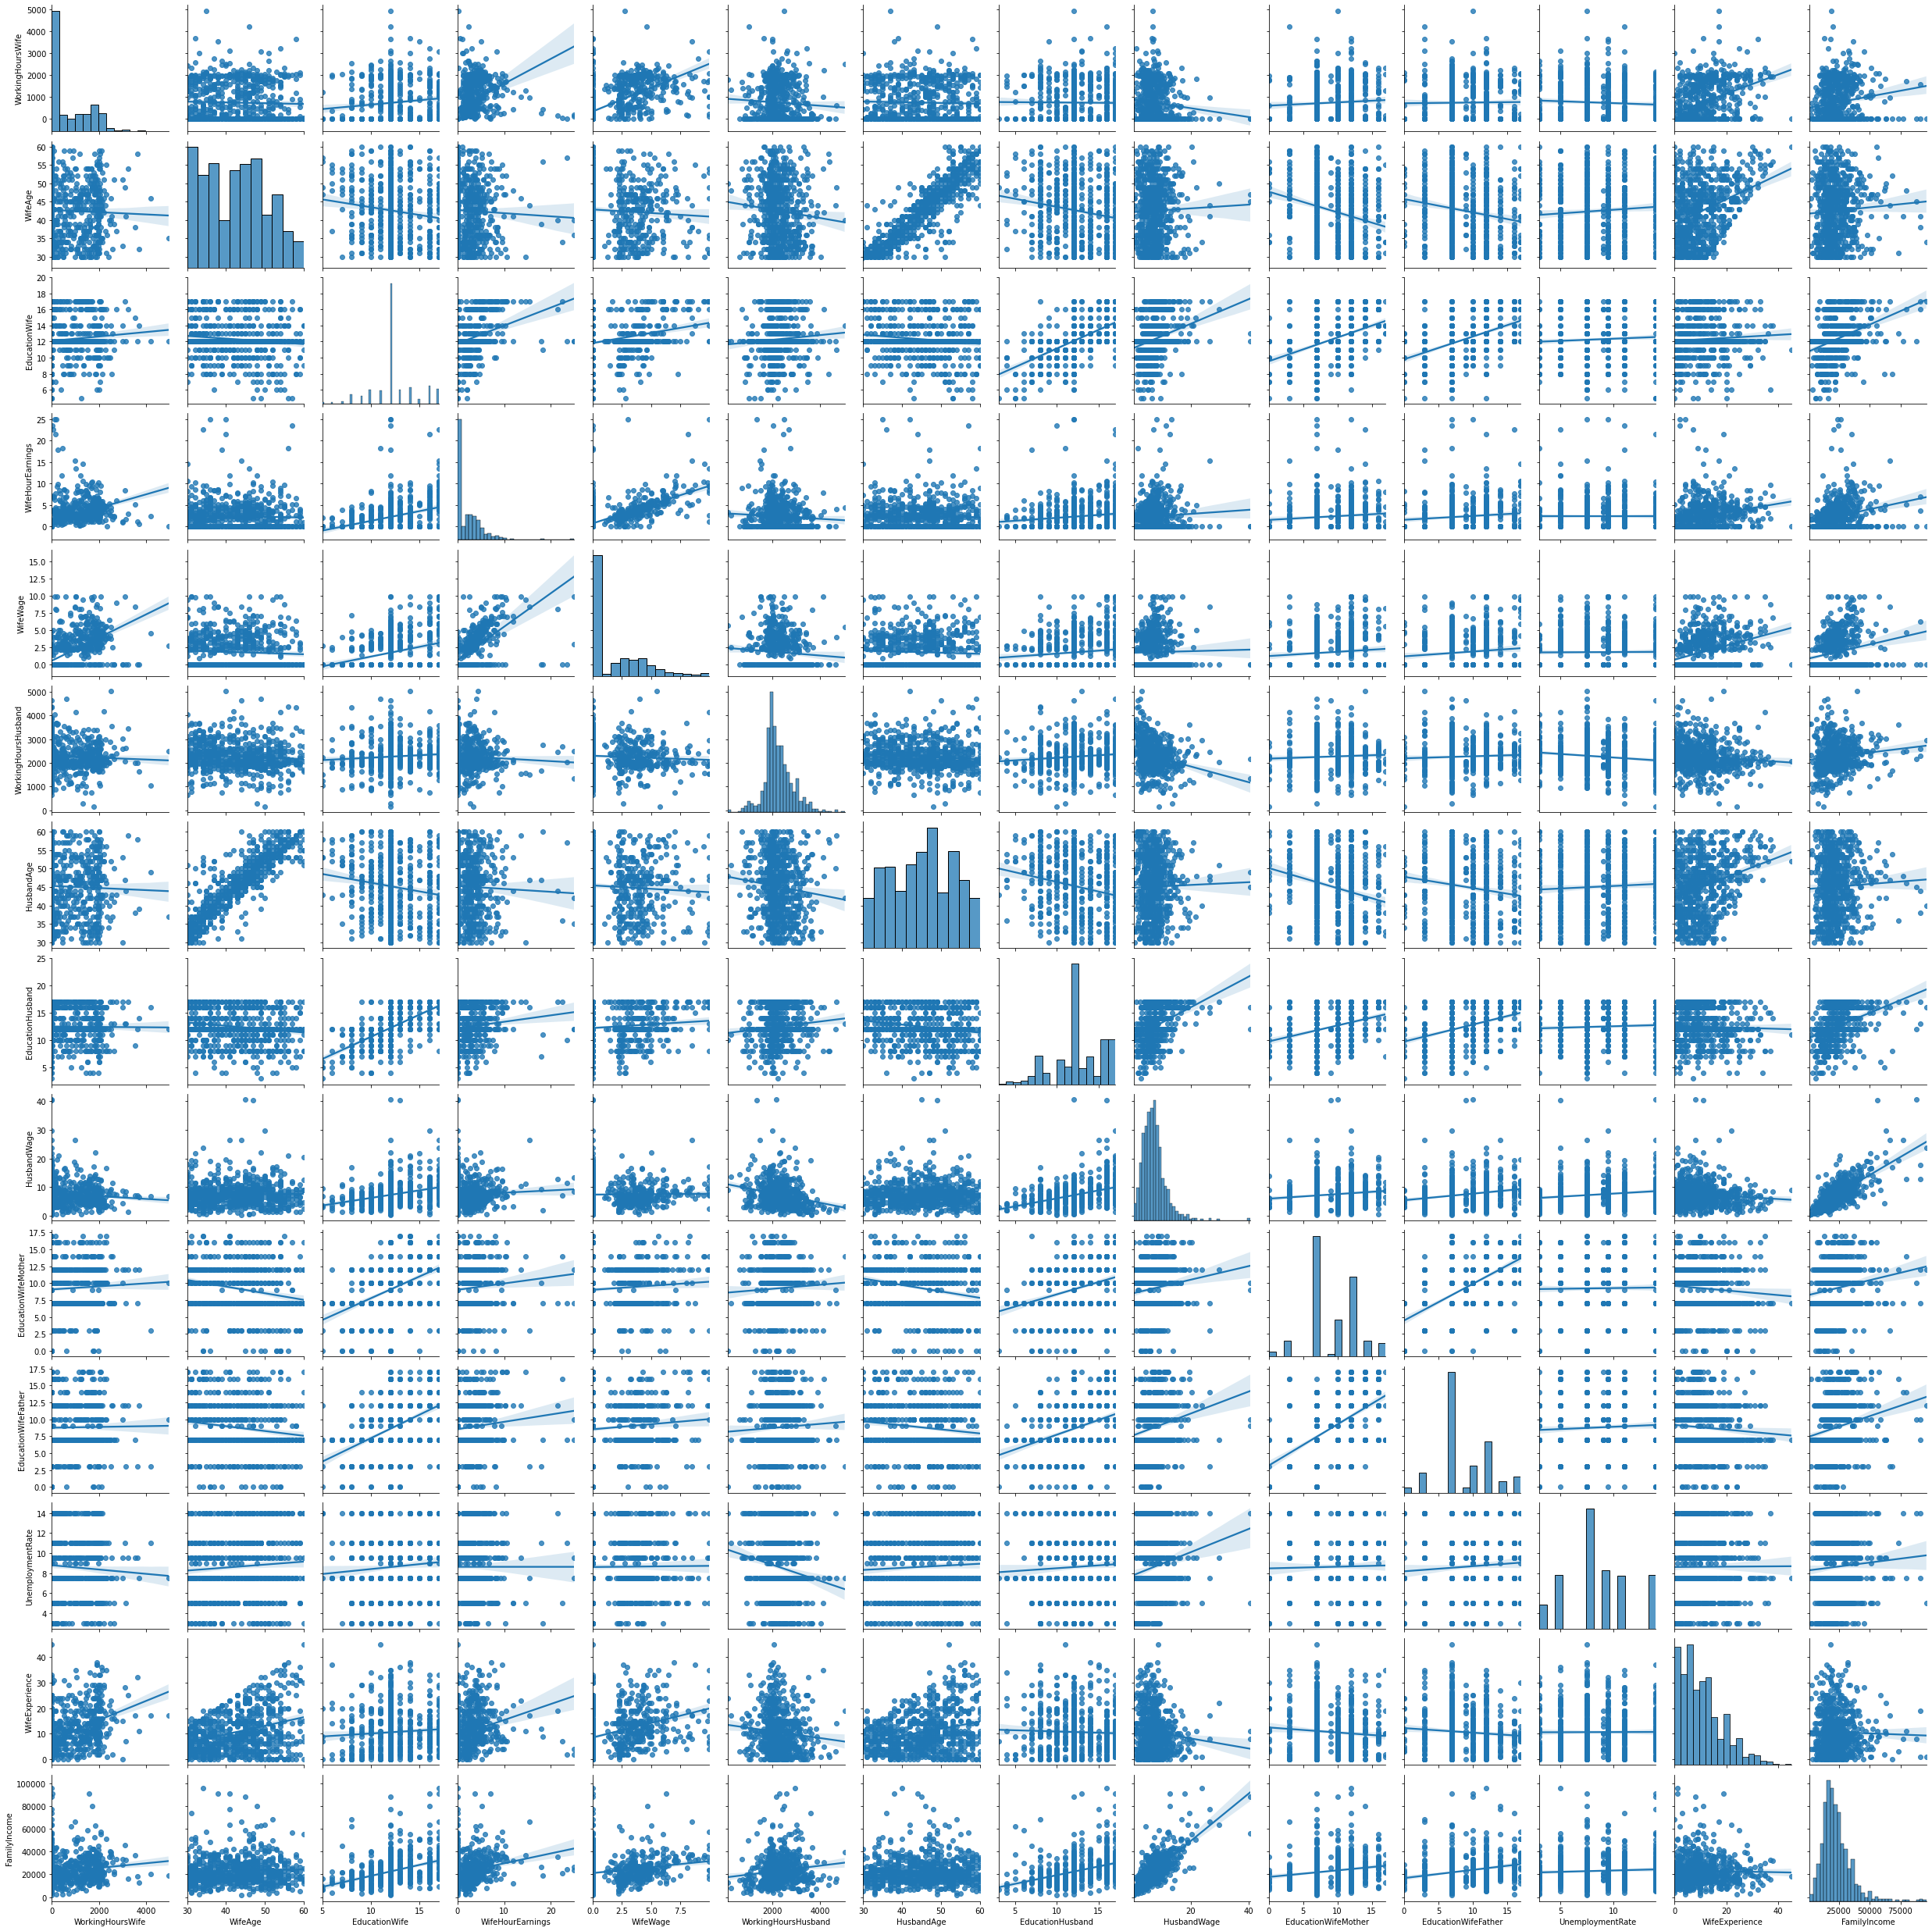

In [14]:
import seaborn as sns
sns.pairplot(inc, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

### This dataset is Income dataset containing 753 records of various factors and variables conatining of Wife's demographics with respect to job,education and Family.

### there are no duplicates neither null values for any variable.

### There are 381 wives who have 12 years of education and 103 wives with more than or equivalent 16-17 years of education and 186 husbands have education equivalent to 16-17 years of education and this combination is resulting into most of the outliers in family income.

### There are insights regarding educated women who have educated parents choosing educated husbands who have high wages  which is resulting high family income, as they are mostly employed and also leading some of the most high value outliers. 



### Upon  doing exporation data analysis of income dataset we have observed family income is affected by various variables like wife's wage, experience and working hours along with husband's wages,education as the well educated parents choose well educated spouses for their children leading to high standard life.

In [15]:
#Doing Correlation 
corr = inc.corr()
corr

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
WorkingHoursWife,1.000000,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.057864,0.013671,-0.060290,0.404959,0.146306
WifeAge,-0.033114,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,-0.234642,-0.160591,0.077077,0.334016,0.052440
EducationWife,0.105960,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.435336,0.442458,0.072140,0.066256,0.361275
WifeHourEarnings,0.422944,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.090305,0.098477,-0.000128,0.250580,0.231175
WifeWage,0.606916,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.085598,0.102772,0.009124,0.341557,0.208712
WorkingHoursHusband,-0.056348,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.053354,0.050345,-0.155220,-0.099366,0.128142
HusbandAge,-0.031089,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,-0.227457,-0.135000,0.053094,0.271910,0.040503
EducationHusband,-0.009650,-0.163049,0.611954,0.126224,0.106967,0.107845,-0.195323,1.000000,0.394665,0.324475,0.366700,0.055017,-0.036301,0.376872
HusbandWage,-0.098599,0.027015,0.284936,0.061290,0.019276,-0.236021,0.019681,0.394665,1.000000,0.126736,0.193229,0.157920,-0.103306,0.725023
EducationWifeMother,0.057864,-0.234642,0.435336,0.090305,0.085598,0.053354,-0.227457,0.324475,0.126736,1.000000,0.573072,0.018402,-0.082179,0.159894


 Heatmap For checking the correlation 

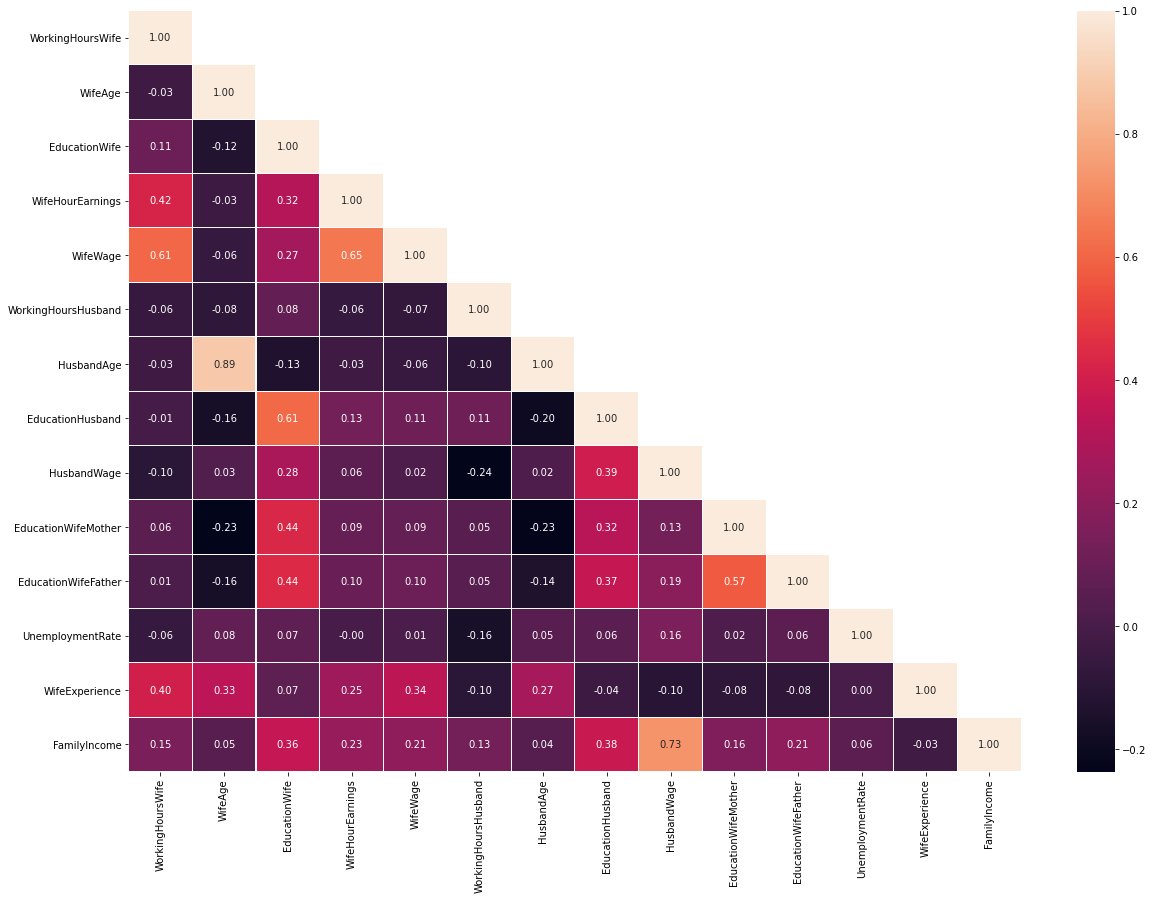

In [16]:
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1), fmt= '.2f',linewidths=0.05,);



<div class="alert alert-warning">
<b><font color = green

By observing the the heat map and pairplot we see that there is evidence of multicollinearity within the independent variables.

In this dataset, following predictors for Family Income  are strongly correlated :
    Husband Age and Wife Age.
    Wife wage and working hours wife.
    EducationWifeMother and EducationWifeFather .
    EducationHusband and EducationWife.



<div class="alert alert-warning">
<b><font color = black

2.3) Perform Multiple Linear Regression (using the 'statsmodels' library) and comment on the model thus built.

In [17]:
#droping dependent variable 'FamilyIncome'

X =inc.drop(labels='FamilyIncome',axis=1)
Y = inc['FamilyIncome'].copy()

In [18]:
X.head(2)

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5


In [19]:
#importing statsmodels
import statsmodels.api as sm

In [20]:
# This adds the constant term beta0 to the Multiple Linear Regression.
X_1 =sm.add_constant(X)

In [21]:
model = sm.OLS(Y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          8.01e-186
Time:                        22:12:59   Log-Likelihood:                -7692.7
No. Observations:                 753   AIC:                         1.541e+04
Df Residuals:                     739   BIC:                         1.548e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.224e+04   2455.663     -9.057      0.000   -2.71e+04   -1.74e+04
WorkingHoursWife        2.7718      0.372      7.456      0.000       2.042       3.502
WifeAge               134.1663     68.226      1.967      0.050       0.227     268.106
EducationWife         375.2334    153.202      2.449      0.015      74.471     675.995
WifeHourEarnings      310.9829    101.621      3.060      0.002     111.482     510.484
WifeWage              277.4616    154.003      1.802      0.072     -24.875     579.798
WorkingHoursHusband     6.7790      0.441     15.356      0.000       5.912       7.646
HusbandAge             27.4612     66.582      0.412      0.680    -103.251     158.174
EducationHusband      -75.3354    110.423     -0.682      0.495    -292.115     141.444
HusbandWage          2286.1687     67.840     33.699      0.000    2152.986    2419.351
EducationWifeMother    31.6954     92.865      0.341      0.733    -150.616     214.007
EducationWifeFather    24.6254     87.378      0.282      0.778    -146.913     196.164
UnemploymentRate      -50.9882     80.405     -0.634      0.526    -208.838     106.862
WifeExperience       -107.5475     36.789     -2.923      0.004    -179.771     -35.323
==============================================================================
Omnibus:                      404.335   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5410.657
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.438   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print('The Rsq value is',model.rsquared)

The Rsq value is 0.7050868822822952


In [23]:
y_pred = model.predict(X_1)
print(y_pred)

0      19184.922034
1      26443.029416
2      22869.522847
3      10637.964287
4      29825.819372
           ...     
748    29188.139436
749    10267.140030
750     6530.930844
751    29565.525515
752    20397.177280
Length: 753, dtype: float64


In [24]:
y_pred = model.fittedvalues
y_pred

0      19184.922034
1      26443.029416
2      22869.522847
3      10637.964287
4      29825.819372
           ...     
748    29188.139436
749    10267.140030
750     6530.930844
751    29565.525515
752    20397.177280
Length: 753, dtype: float64

In [25]:
mse = (np.sum(np.square(Y - y_pred)))/df.shape[0]
mse

43766191.98618459

In [26]:
Lr_1 = np.sqrt(mse)

print("The Root Mean Square Error (RMSE) of the model is",Lr_1)

The Root Mean Square Error (RMSE) of the model is 6615.60216353618


<div class="alert alert-warning">
<b><font color = red
         
the R_square value : 0.705 this model is quite good as we getting this R-square value

F-statistic = 135.9
    
The Root Mean Square Error (RMSE) of the model is 6615.60216353618         
         
This model is flawed as  we saw the multi-collinearity in the data which will lead false results hence we should proceed with PCA.
         
         

## Performing Principal Component Analysis on the data and reduce the predictor variables to a suitable number of dimensions.

In [27]:
# Step 1

# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data_scaled=X.apply(zscore)
data_scaled.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


In [28]:
dsf=data_scaled
dsf

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,-0.850518,-0.314588,0.312958,-0.732964,-0.764897,1.264727,-0.263347,1.162261,0.423233,0.222571,0.333687,0.281572,-0.698285
749,-0.850518,-1.430215,-0.125883,-0.732964,-0.764897,-0.354975,-1.505052,-0.162769,-0.619332,0.816884,0.893924,-0.360924,0.417818
750,-0.850518,0.057288,-0.125883,-0.732964,-0.764897,0.194447,-0.263347,-0.162769,-1.512005,0.222571,-1.627143,-0.360924,-0.822297
751,-0.850518,2.164583,-0.125883,-0.732964,-0.764897,-0.944722,1.226699,-1.487800,1.172686,0.816884,0.893924,1.727185,0.541830


In [29]:
# Step 2
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.5472531

In [30]:
data_scaled.cov()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.001330,-0.033158,0.106101,0.423507,0.607723,-0.056423,-0.031130,-0.009663,-0.098730,0.057941,0.013689,-0.060370,0.405497
WifeAge,-0.033158,1.001330,-0.120383,-0.034605,-0.058392,-0.084484,0.889319,-0.163266,0.027051,-0.234954,-0.160804,0.077179,0.334460
EducationWife,0.106101,-0.120383,1.001330,0.318801,0.267930,0.079021,-0.133699,0.612768,0.285315,0.435915,0.443047,0.072236,0.066344
WifeHourEarnings,0.423507,-0.034605,0.318801,1.001330,0.652508,-0.059999,-0.031878,0.126392,0.061371,0.090425,0.098608,-0.000128,0.250913
WifeWage,0.607723,-0.058392,0.267930,0.652508,1.001330,-0.070891,-0.055473,0.107109,0.019302,0.085712,0.102909,0.009136,0.342011
WorkingHoursHusband,-0.056423,-0.084484,0.079021,-0.059999,-0.070891,1.001330,-0.095514,0.107988,-0.236335,0.053425,0.050412,-0.155426,-0.099498
HusbandAge,-0.031130,0.889319,-0.133699,-0.031878,-0.055473,-0.095514,1.001330,-0.195582,0.019707,-0.227759,-0.135180,0.053164,0.272272
EducationHusband,-0.009663,-0.163266,0.612768,0.126392,0.107109,0.107988,-0.195582,1.001330,0.395190,0.324906,0.367187,0.055090,-0.036349
HusbandWage,-0.098730,0.027051,0.285315,0.061371,0.019302,-0.236335,0.019707,0.395190,1.001330,0.126904,0.193486,0.158130,-0.103444
EducationWifeMother,0.057941,-0.234954,0.435915,0.090425,0.085712,0.053425,-0.227759,0.324906,0.126904,1.001330,0.573834,0.018427,-0.082288


In [31]:
# Step 3

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

In [32]:
eig_vals, eig_vecs = np.linalg.eig(data_scaled.cov())
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

In [33]:
# Step 4

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [22.909952727776105, 18.51644154604994, 13.717349758794766, 9.490342942168759, 7.142244968694188, 6.60615729749124, 5.306910765021304, 4.1489013600325295, 3.3926663131857535, 3.227152513087386, 2.494676606741436, 2.227146383598737, 0.8200568173578593]


In [34]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.90995273  41.42639427  55.14374403  64.63408697  71.77633194
  78.38248924  83.68940001  87.83830137  91.23096768  94.45812019
  96.9527968   99.17994318 100.        ]


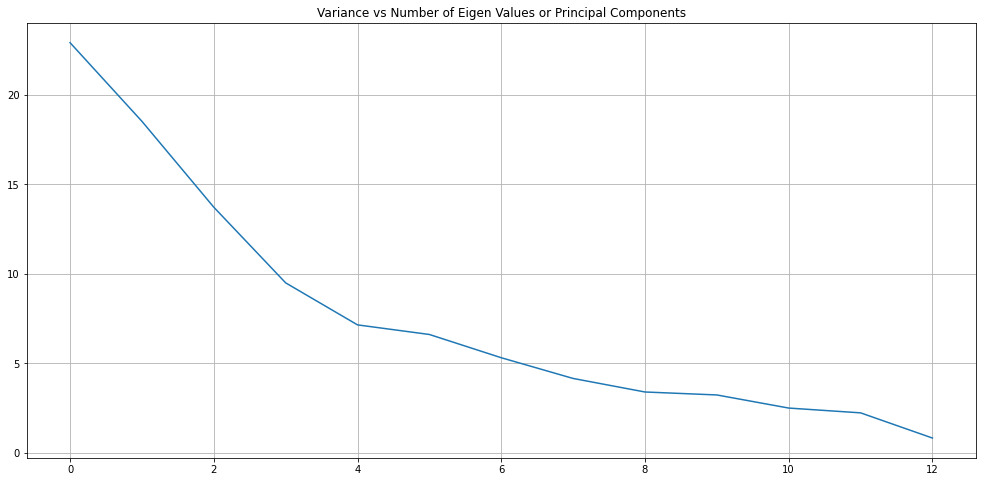

In [35]:
# Step 5

plt.figure(figsize=(17,8))
plt.plot(var_exp)
plt.title('Variance vs Number of Eigen Values or Principal Components')
plt.grid()

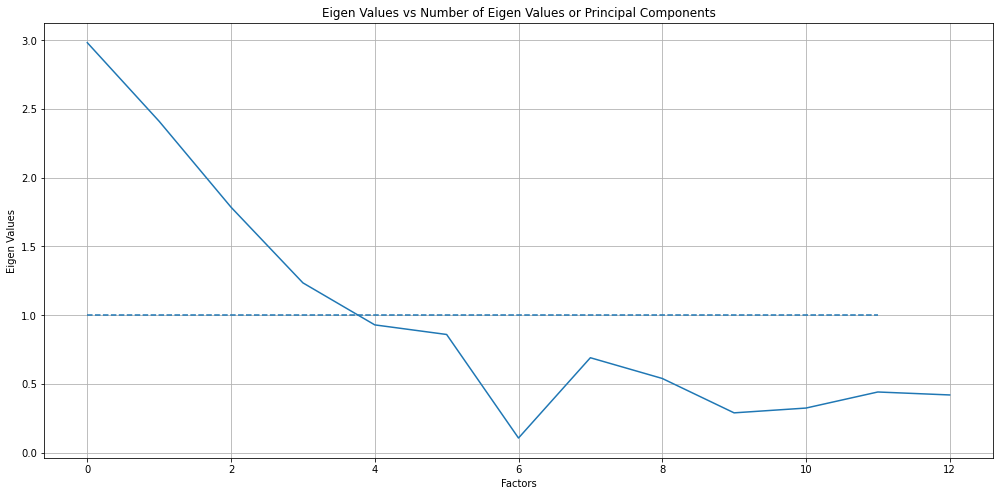

In [36]:
plt.figure(figsize=(17,8))
plt.plot(eig_vals)
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=11,linestyles='dashed')
plt.title('Eigen Values vs Number of Eigen Values or Principal Components');

In [37]:
print('From the above plot, we can see that the number of components that we can probably take is 5.\n'
      'We also see that if we take 5 components the total amount of variance explained is',cum_var_exp[5],'%')

From the above plot, we can see that the number of components that we can probably take is 5.
We also see that if we take 5 components the total amount of variance explained is 78.38248924097499 %


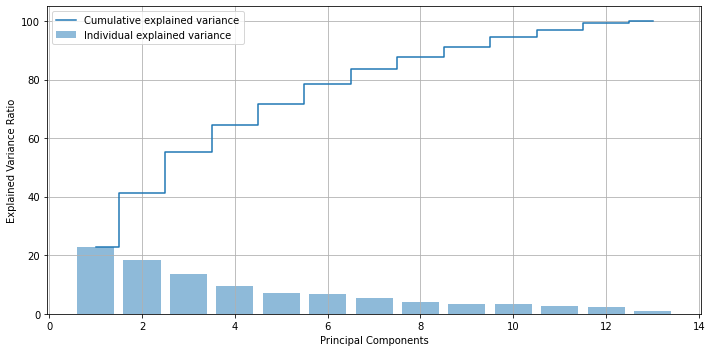

In [38]:
# Let us now plot one more graph with both the variance explained by each eigen value 
#and the cumulative variance explained.

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()

In [39]:
from statsmodels.multivariate.factor import Factor

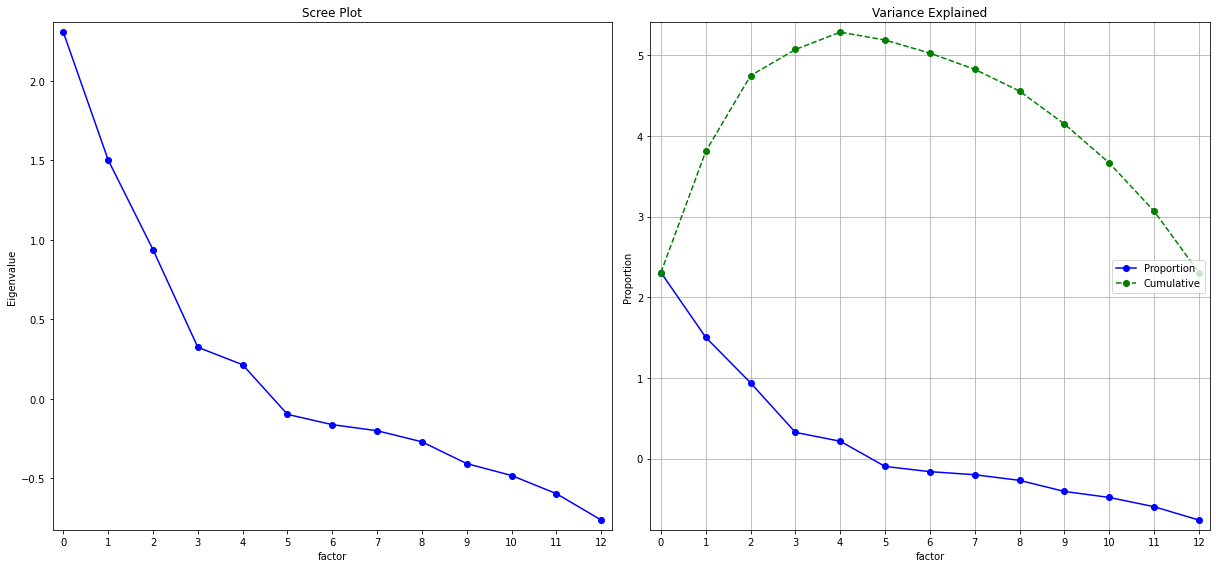

In [40]:
rcParams['figure.figsize'] = 17, 8

model=Factor(X).fit()
model.plot_scree()
plt.grid()
plt.show()

### Factors considerted : 5

### As per scree plot's golden rule we should consider 3 factors for PCA but we are taking 5 factors because 3 factors are not covering most of the variance as compared to 5 factors.

In [41]:
from statsmodels.multivariate.pca import PCA

In [42]:
pc = PCA(X, 
         ncomp=5,
         standardize=True,  
         normalize=True,    
         missing=None,method='eig')

In [43]:
df_comp = pc.loadings.T
df_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,0.272897,-0.469483,-0.217753,0.132601,0.200938,0.165626,-0.459676,-0.252043,-0.418032,-0.099204,-0.199590,-0.268341,-0.032294
comp_3,-0.018008,0.240811,0.147597,-0.087855,-0.096155,0.650796,0.240164,0.079821,-0.375879,0.204903,0.204439,-0.417127,0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269


### Following are the factors for the PCA that are being considered for modelling. 

#### comp_0 - Couple Education
#### comp_1 - Wife Contribution
#### comp_2 - Family Age
#### comp_3 - Husband Contribution
#### comp_4 - Family education

In [44]:
X_reduced = pc.factors
X_reduced.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.019107,-0.001738,0.067640,0.020916,0.000299
1,-0.005178,-0.015930,0.058042,-0.054033,-0.005109
2,-0.019851,0.019512,0.065041,0.041485,0.004189
3,0.022086,-0.000003,0.028621,0.000746,0.006209
4,-0.055158,-0.009212,0.028315,-0.033167,-0.031157


In [45]:
X_reduced_corr = X_reduced.corr()
X_reduced_corr

,comp_0,comp_1,comp_2,comp_3,comp_4
comp_0,1.000000e+00,9.473759e-16,-2.832478e-16,2.265983e-16,-3.599822e-16
comp_1,9.473759e-16,1.000000e+00,-2.417744e-15,6.107311e-16,3.166277e-16
comp_2,-2.832478e-16,-2.417744e-15,1.000000e+00,2.734358e-16,2.378502e-16
comp_3,2.265983e-16,6.107311e-16,2.734358e-16,1.000000e+00,-3.804669e-16
comp_4,-3.599822e-16,3.166277e-16,2.378502e-16,-3.804669e-16,1.000000e+00


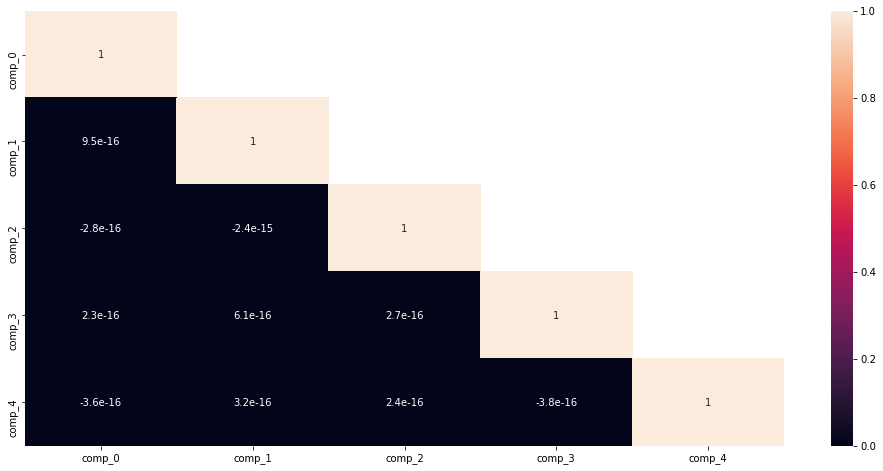

In [46]:
sns.heatmap(X_reduced_corr,annot=True,mask=np.triu(X_reduced_corr,+1));

### Multiple Linear Regression Model

In [47]:
# This adds the constant term beta0 to the Multiple Linear Regression.

X_pca=sm.add_constant(X_reduced)

In [48]:
model_pca = sm.OLS(Y,X_pca).fit()
model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.34e-90
Time:                        22:13:01   Log-Likelihood:                -7936.4
No. Observations:                 753   AIC:                         1.588e+04
Df Residuals:                     747   BIC:                         1.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.308e+04    334.555     68.989      0.000    2.24e+04    2.37e+04
comp_0      -1.39e+05   9180.474    -15.138      0.000   -1.57e+05   -1.21e+05
comp_1      2.755e+04   9180.474      3.001      0.003    9528.514    4.56e+04
comp_2     -1.151e+05   9180.474    -12.539      0.000   -1.33e+05   -9.71e+04
comp_3     -2.398e+04   9180.474     -2.612      0.009    -4.2e+04   -5952.926
comp_4       1.22e+05   9180.474     13.292      0.000    1.04e+05     1.4e+05
==============================================================================
Omnibus:                      327.838   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.257
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      10.323   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print('The Rsq value is',model_pca.rsquared)

The Rsq value is 0.43660742366773064


#### comp_0 - Couple Education
#### comp_1 - Wife Contribution
#### comp_2 - Family Age
#### comp_3 - Husband Contribution
#### comp_4 - Family education

#### Wife Contribution and Husband Contribution are one of the principal factors affecting the family income. Second comes other factors which are family education and Couple education.

#### R-square value is 0.437 and the adjusted R_square value is 0.433 is consequence of the outliers present in the factors responsible for this model leading to this R-Square value.

In [50]:
y_pred_pca = model_pca.predict(X_pca)
print(y_pred_pca)

0      17437.028369
1      17352.089161
2      18406.654876
3      17456.275198
4      24226.267335
           ...     
748    27910.709059
749    15604.830966
750    15836.135636
751    20546.643146
752    16847.422683
Length: 753, dtype: float64


In [51]:
y_fitted_pca = model_pca.fittedvalues
print(y_fitted_pca)

0      17437.028369
1      17352.089161
2      18406.654876
3      17456.275198
4      24226.267335
           ...     
748    27910.709059
749    15604.830966
750    15836.135636
751    20546.643146
752    16847.422683
Length: 753, dtype: float64


In [52]:
mse_pca = (np.sum(np.square(Y - y_pred_pca)))/df.shape[0]
mse_pca

83609531.6823168

In [53]:
Lr_pca = np.sqrt(mse_pca)

print("The Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is",Lr_pca)

The Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is 9143.824784099748


In [54]:
print("The Root Mean Square Error (RMSE) of the model with all the predictor variables is",Lr_1,"\nThe Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is",Lr_pca)

The Root Mean Square Error (RMSE) of the model with all the predictor variables is 6615.60216353618 
The Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is 9143.824784099748


In [55]:
# After the PCA the adjusted R-Square value went down to 0.433 which is little low as compaed to standards which implies model has not 
# improved which means we have to improve the model more as there may be some other factors which are missing like husband'sexperience,husband-hours-earning etc and also because of the outliers present.

In [56]:
##Business Implication

##  The factors are affecting the family income is education of every member in the family and wages which in turn tell youthat higher the education higher the family income and better life upon consideration of outliers in family income.
## Those with education below graduation are in middle class income range as this implies with the parent's education and also this has been observed educated people chooose educated spouses and husband wages are directly related to family income saying husbands are the bread winners for the most of the families and next comes the wives.
## Also parents of Wives are contributing somewhat or the other by their education.